<a href="https://colab.research.google.com/github/raviakasapu/LLM-Training-Docs/blob/main/Vector_Databases_for_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Databases for Large Language Models (LLMs)


* [Embeddings](#Embeddings)

* [Tokenization](#Tokenization)

* [Vector Databases](#VectorDatabases)


<a name="Embeddings"></a>
## Embeddings

Embeddings are the mathematical representations of features either in a Matrix or Tensor format for nueral networks. The Embeddings will be used as the Inputs for the ML Models or used for neural network training for LLM's.

In other words, Word embeddings are low dimensional real vectors (or arrays) , that represent relationship between words that preserve context of the data. They capture the linear representation of distances in data


There are various types of embeddings depending on the type of the ML tasks

* Word Embeddings
* Entity Embeddings
* Neural Network Embeddings

Below is a short course on Embeddings from Google.
[Embeddings short course from Google](https://developers.google.com/machine-learning/crash-course/embeddings/motivation-from-collaborative-filtering)

 and [OpenAI documentation on Embeddings](https://platform.openai.com/docs/guides/embeddings/what-are-embeddings)

### Use Cases

There are many real word business examples where embeddings are used in Vector Databases in

* Sentiment Analysis -- Identity/classify the tone of the sentence or a review
* Named Entity Recognition -- Identify various words depending on the business context
* Text Classification -- Predict next word in the sentence
* Text or Image Search
* image classification -- Classify images or predict next image
* Recommendation Systems -- To predict the nxt purchase or video

We can create embeddings using
* Word2vec
* One hot encoding
* Principal Component Analysis (PCA)
* Singular Value Decomposition (SVD)
* BERT
etc.

[You can read more on how to create Word embeddings using below](https://www.featureform.com/post/the-definitive-guide-to-embeddings)

In [ ]:
import pandas as pd
import numpy as np
# fruits dataframe
fruits = ('Apple','Banana','Orange','Watermelon')
fruits_df = pd.DataFrame(fruits, columns=['fruit_names'])

dummy = pd.get_dummies(fruits_df, columns=["fruit_names"], prefix=["o"] )

fruits_df = fruits_df.join(dummy)
fruits_df

,fruit_names,o_Apple,o_Banana,o_Orange,o_Watermelon
0,Apple,1,0,0,0
1,Banana,0,1,0,0
2,Orange,0,0,1,0
3,Watermelon,0,0,0,1



When creating embeddings, we need to take care of number of dimensions of the resulting embedding vector. Having High Dimensional vector result in over fitting and Slow training. We also need more data to overcome the overfitting.

We can use Dimensionality reduction techniques like t-distributed stochastic neighbor embedding (t-SNE), Uniform Manifold Approximation and Projection(UMAP) etc

<a name="Tokenization"></a>
## Tokenization

Tokenization means Converting unstructured text data into numnerical represention. We can use `nltk` for creating token from text.




### Example of Tokenization using nltk

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "Apples are red"
words = word_tokenize(text)
print(words)

['Apples', 'are', 'red']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Different types of tokenizatons
* Word Tokenization
* Sentence Tokenization
* Punctuation Tokenization

Once the tokens are generated, these tokens are used to create embedding vectors for further use in Neural networks

### Generationg Embeddings - example using OpenAI api

#### install OpenAI

In [ ]:
!pip install openai

####.
in the example below we are trying to get the embeddings for the work `Tree`.
We are using a model `text-embedding-ada-002`

The total number of dimension output is 1536. The output will consist of an array of numbers listed in example

In [ ]:
import openai
import os

In [ ]:
#openAi API key is needed to access the API
#paid key
os.environ["OPENAI_API_KEY"]=<input your key here>
openai.api_key = os.environ["OPENAI_API_KEY"]

In [ ]:
embedding = openai.Embedding.create(
    input="Apple", model="text-embedding-ada-002"
)["data"][0]["embedding"]

print("Length of embeddings is - {} ".format(len(embedding)))
print("example - {}".format(embedding[0:10]))

Length of embeddings is - 1536 
example - [0.014471519738435745, -0.003915661945939064, -0.002734802197664976, -0.037787504494190216, -0.005846110638231039, 0.019044354557991028, -0.017771080136299133, -0.016922229900956154, 0.020153336226940155, -0.015101310797035694]


### Generating Embeddings using LangChain - OpenAI

#### install LangChain

In [ ]:
!pip install langchain
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.7 MB/s eta 0:00:00


#### .

We can also use LangChain to generate embeddings from OpenAI

[LangChain Documentation](https://python.langchain.com/docs/modules/data_connection/text_embedding/)


In [ ]:
from langchain.embeddings import OpenAIEmbeddings
import tiktoken

embeddings_model = OpenAIEmbeddings(openai_api_key=os.environ["OPENAI_API_KEY"])

In [ ]:
embeddings = embeddings_model.embed_documents(
    [
        "Apple"
    ]
)
print("Length of embeddings is - {} ".format(len(embedding)))
print("example - {}".format(embedding[0:10]))

Length of embeddings is - 1536 
example - [0.014471519738435745, -0.003915661945939064, -0.002734802197664976, -0.037787504494190216, -0.005846110638231039, 0.019044354557991028, -0.017771080136299133, -0.016922229900956154, 0.020153336226940155, -0.015101310797035694]


In the examples above we have only used to generate embeddings for single word. But we can provide complete sentences or documents to generate the embeddings.

<a name="VectorDatabases"></a>
### Vector Databases

Embeddings generated by LLMs are huge in number of dimensions and features. The embeddings need to be stored and queried, and require a different type of database that can handle indexing and search capabilities.

Vector databases can handle complexity in storing and extraction of data and offer performance, scalability in handling the data.


There are several types vector Libraries and Vector Databases that can offer various advantages and features. Depending on the use case, we can use required vector store. You can read more details from [here](https://weaviate.io/blog/vector-library-vs-vector-database)

There are several Vector stores like
* Chroma
* FAISS
* Lance

and Vector Data bases like
* Weaviate
* Pinecone
* Redis

and many more



Vector databases has several use cases like
* Similarity search for LLMs
* Act as a Long term memory for LLMs
* useful in Caching the for Q&A in an LLM app



In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving vector_databases.png to vector_databases (1).png


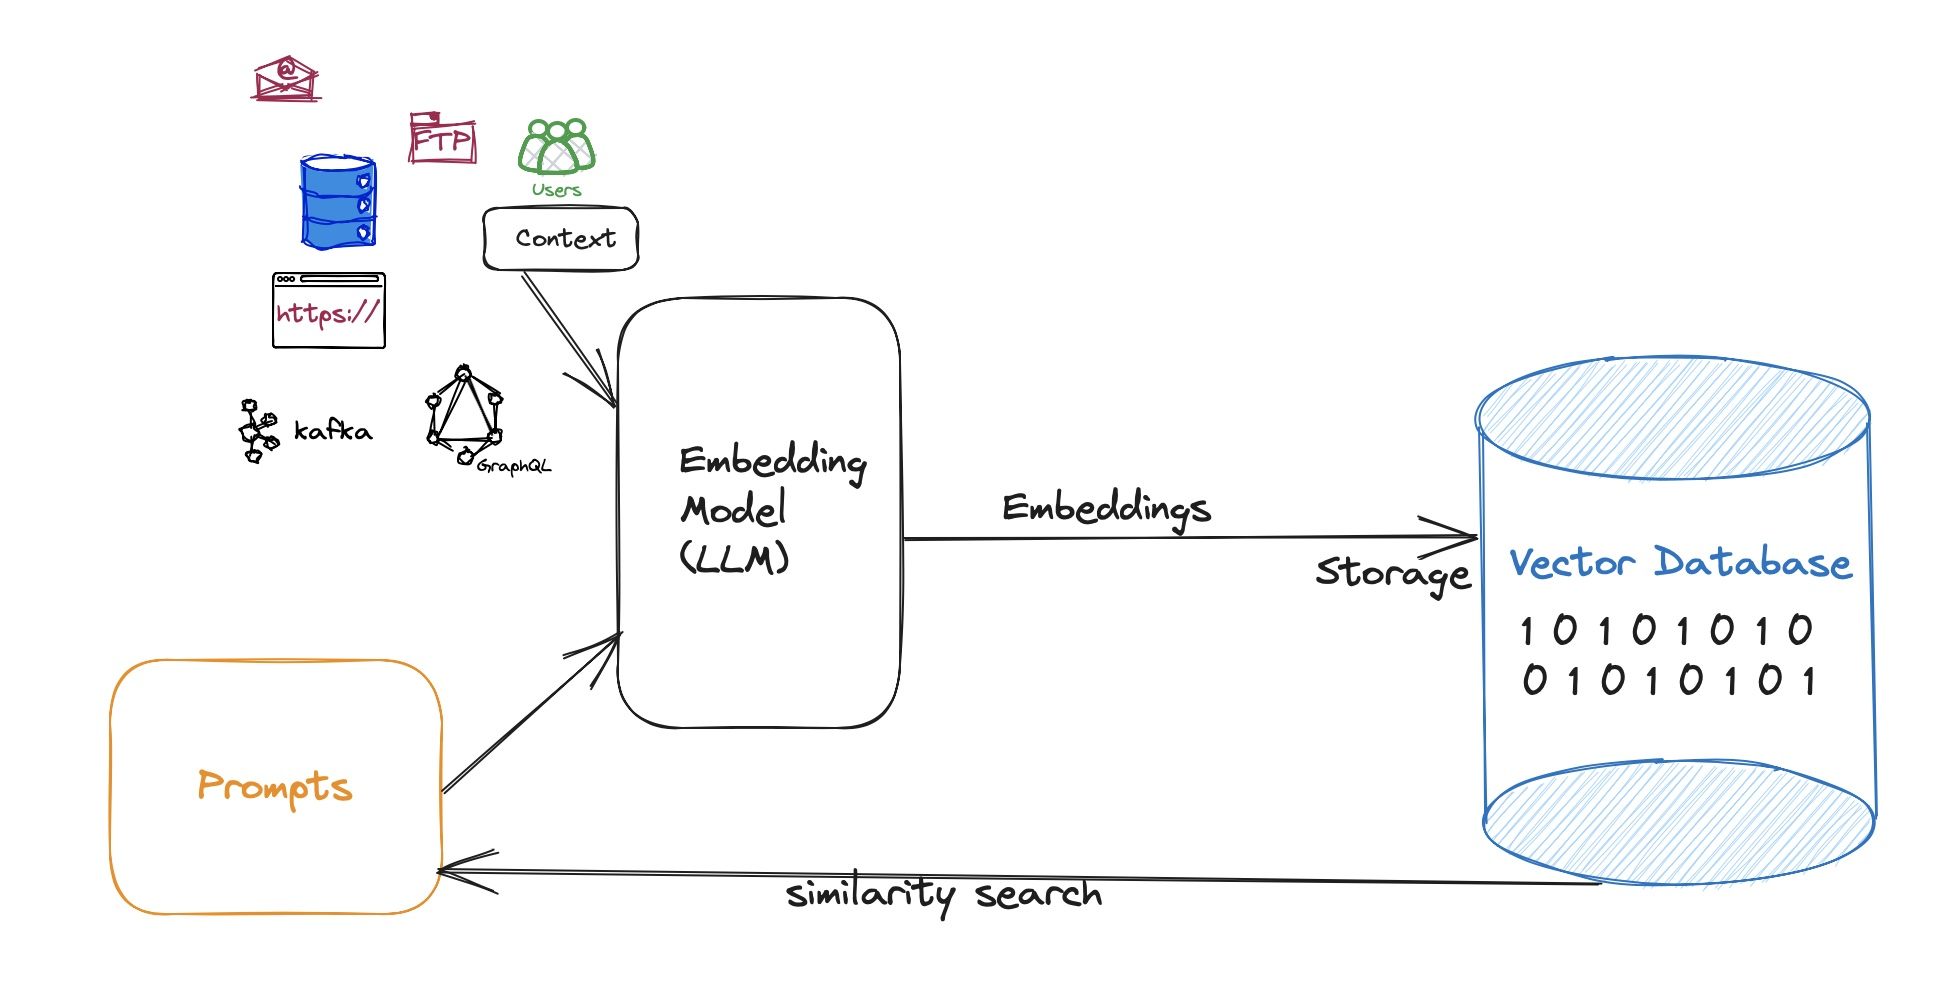

In [ ]:
Image('vector_databases.png')